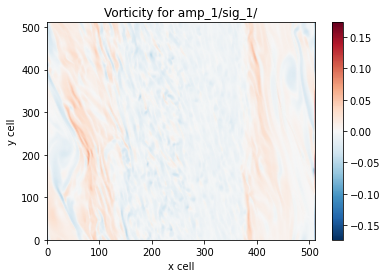

done


In [4]:
import sys
sys.path.append('~/athena-public-version/vis/python/')
#sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#IMPORT APPROPRIATE ATHINPUT FILE
#import athinput.hgb as athin
import athena_read

def vorticity(file_name):
    data = athena_read.athdf(file_name)    
    #constants
    omega0 = 1.0
    qshear = 1.5
    Nx = len(data['x1v'])
    Ny = len(data['x2v'])
    Nz = len(data['x3v'])
    
    #assuming 64x256x256, but should work for any 
    overall_length = Nx*Ny*Nz
    data_arr = []
    #array of vshear possible values
    vsh = -qshear*omega0*data['x1v']
    vsh_3d = np.broadcast_to(vsh,(Nz,Ny,Nx))
    vel_y = data['vel2']-vsh_3d
    vel_x = data['vel1']
    vel_z = data['vel3']
    
    
    #calculate the two necessary partial derivatives
    #partial vy / partial x
    partvypartx=np.gradient(vel_y,axis=2)
    
    #overwrite edge cases
    #rolled forward
    partvypartx_rf= np.gradient(np.roll(vel_y,1,axis=2),axis=2)
    partvypartx[:,:,0]=partvypartx_rf[:,:,1]
    #rolled back
    partvypartx_rb = np.gradient(np.roll(vel_y,-1,axis=2),axis=2)
    partvypartx[:,:,-1]=partvypartx_rb[:,:,-2]
    
    #partial vx/ partial y
    partvxparty=np.gradient(vel_x,axis=1)
    #overwrite edge cases
    #rolled forward
    partvxparty_rf= np.gradient(np.roll(vel_x,1,axis=1),axis=1)
    partvxparty[:,0,:]=partvxparty_rf[:,1,:]
    #rolled back
    partvxparty_rb = np.gradient(np.roll(vel_x,-1,axis=1),axis=1)
    partvxparty[:,-1,:]=partvxparty_rb[:,-2,:]
    
    #vorticity
    vorticity = partvypartx - partvxparty
    #z average
    vorticity = np.average(vorticity,axis=0)
    
    #plotting section
    title='Vorticity for '+str(file_name[10:-20])
    plt.pcolormesh(vorticity,norm=mpl.colors.CenteredNorm(),shading = 'gouraud',cmap = 'RdBu_r')
    plt.colorbar()
    plt.xlabel('x cell')
    plt.ylabel('y cell')
    plt.title(title)
    plt.show()
    return 'done with vorticity'

print(vorticity('./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf'))